In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Input
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Activation
from tensorflow.keras.layers import Reshape, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import scipy.io as sio

Using TensorFlow backend.


In [ ]:
tf.test.gpu_device_name()

''

In [ ]:
from google.colab import files
uploaded = files.upload()

# from google.colab import drive

# drive.mount('/content')

Saving Label.csv to Label.csv
Saving RSS_LOS.csv to RSS_LOS.csv
Saving RSS_total.csv to RSS_total.csv


In [ ]:
import io
X = pd.read_csv(io.BytesIO(uploaded['RSS_total.csv']))
Y = pd.read_csv(io.BytesIO(uploaded['Label.csv']))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [ ]:
print("- Training-set:\t\t{}".format(x_train.shape[0]))
print("- Test-set:\t\t{}".format(x_test.shape[0]))
print(" Shape of train target set:{}".format(y_train.shape))
print(" Shape of test target set:{}".format(y_test.shape))

- Training-set:		90000
- Test-set:		10000
 Shape of train target set:(90000, 6)
 Shape of test target set:(10000, 6)


In [ ]:
scalerX = StandardScaler().fit(x_train)
x_train = scalerX.transform(x_train)
x_test = scalerX.transform(x_test)
scalerY = StandardScaler().fit(y_train)
y_train = scalerY.transform(y_train)

In [ ]:
dim_in = x_train.shape[1]
dim_out = y_train.shape[1]
state_bias = True
kernel_size = 16
filters = 64
p_dropout = 0.2
activation_1 = 'relu'
activation_2 = 'linear'

In [ ]:
model = Sequential()

model.add(InputLayer(input_shape=((dim_in))))
model.add(Reshape((dim_in, 1)))

model.add(Conv1D(kernel_size=kernel_size, filters=filters, strides=1, padding='same', dilation_rate=1, activation=activation_1, use_bias=state_bias, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
model.add(Dropout(p_dropout))
model.add(BatchNormalization())

model.add(Conv1D(kernel_size=kernel_size, filters=filters, strides=1, padding='same', dilation_rate=1, activation=activation_1, use_bias=state_bias, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
model.add(Dropout(p_dropout))
model.add(BatchNormalization())

model.add(Conv1D(kernel_size=kernel_size, filters=filters, strides=1, padding='same', dilation_rate=1, activation=activation_1, use_bias=state_bias, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
model.add(Dropout(p_dropout))
model.add(BatchNormalization())

model.add(Conv1D(kernel_size=kernel_size, filters=filters, strides=1, padding='same', dilation_rate=1, activation=activation_1, use_bias=state_bias, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
model.add(Dropout(p_dropout))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(dim_out, use_bias=state_bias, activation=activation_2))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               1280      
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)              

In [ ]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=optimizer, loss='mse',  metrics=['mae'])

In [ ]:
%%time
history = model.fit(x=x_train, y=y_train, epochs=30, batch_size=128, validation_split=0.2,verbose=1)

Epoch 1/30
563/563 [==============================] - 8s 13ms/step - loss: 0.8933 - mae: 0.6991 - val_loss: 0.6204 - val_mae: 0.5626
Epoch 2/30
563/563 [==============================] - 7s 13ms/step - loss: 0.6332 - mae: 0.5746 - val_loss: 0.5819 - val_mae: 0.5311
Epoch 3/30
563/563 [==============================] - 7s 12ms/step - loss: 0.6078 - mae: 0.5569 - val_loss: 0.5759 - val_mae: 0.5244
Epoch 4/30
563/563 [==============================] - 7s 12ms/step - loss: 0.5992 - mae: 0.5498 - val_loss: 0.5662 - val_mae: 0.5168
Epoch 5/30
563/563 [==============================] - 7s 12ms/step - loss: 0.5942 - mae: 0.5454 - val_loss: 0.5603 - val_mae: 0.5124
Epoch 6/30
563/563 [==============================] - 7s 13ms/step - loss: 0.5902 - mae: 0.5421 - val_loss: 0.5563 - val_mae: 0.5102
Epoch 7/30
563/563 [==============================] - 7s 13ms/step - loss: 0.5853 - mae: 0.5386 - val_loss: 0.5540 - val_mae: 0.5064
Epoch 8/30
563/563 [==============================] - 7s 13ms/step - 

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mae,val_loss,val_mae,epoch
0,0.893327,0.699133,0.620423,0.562592,0
1,0.633173,0.574565,0.581859,0.531073,1
2,0.607773,0.556881,0.575920,0.524375,2
3,0.599218,0.549814,0.566218,0.516801,3
4,0.594218,0.545391,0.560267,0.512442,4
5,0.590208,0.542057,0.556278,0.510188,5
6,0.585296,0.538584,0.553979,0.506439,6
7,0.582196,0.535907,0.550811,0.503901,7
8,0.578285,0.532488,0.553597,0.506093,8
9,0.577200,0.531187,0.545867,0.501115,9


In [ ]:
hist.to_csv('hist_total_.csv', index=False)

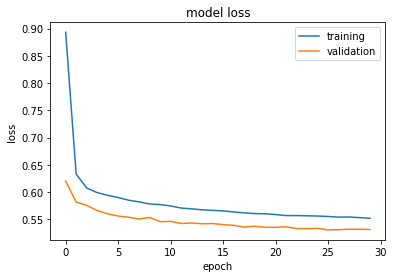

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.legend(['training','validation'])
plt.xlabel('epoch')
plt.show()
%matplotlib inline

In [ ]:
%%time
y_predict = model.predict(x_test)

CPU times: user 377 ms, sys: 27.3 ms, total: 405 ms
Wall time: 315 ms


In [ ]:
y_predict = scalerY.inverse_transform(y_predict)

In [ ]:
y_test = pd.DataFrame(y_test)
y_test.to_csv('y_test_total.csv', index=False)
y_predict = pd.DataFrame(y_predict)
y_predict.to_csv('y_predict_total.csv', index=False)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=4)

In [ ]:
%%time
neigh.fit(x_train, y_train)

CPU times: user 91.9 ms, sys: 0 ns, total: 91.9 ms
Wall time: 93.4 ms


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [ ]:
%%time
y_predict = neigh.predict(x_test)

CPU times: user 135 ms, sys: 0 ns, total: 135 ms
Wall time: 136 ms
